In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The cereal data will first be loaded into pandas dataframe, df.

In [2]:
df = pd.read_csv('cereal.csv')

According to the US Governments Dietary Guidelines’ Executive Summary, sugar and saturated fat should be limited to less than 10% of calories per day. A sugar and fat percentage based on total calories column is going to be added into the dataframe to remove data that will not be recommended more easily. Note that the provided data only gives fat and not saturated fat, therefore it will be assumed that all fat provided will be saturated fat.

In [3]:
df['sugars%'] = df['sugars']/df['calories']
df['fat%'] = df['fat']/df['calories']

# Here we will copy df to initiate our recommeded cereals dataframe
recs_df = df.copy()

To follow nutritional guidelines, any cereal that has greater than 10% sugar should be removed from the recommended dataframe, recs_df. Here the sugar percentage of all cereals will be visualized.

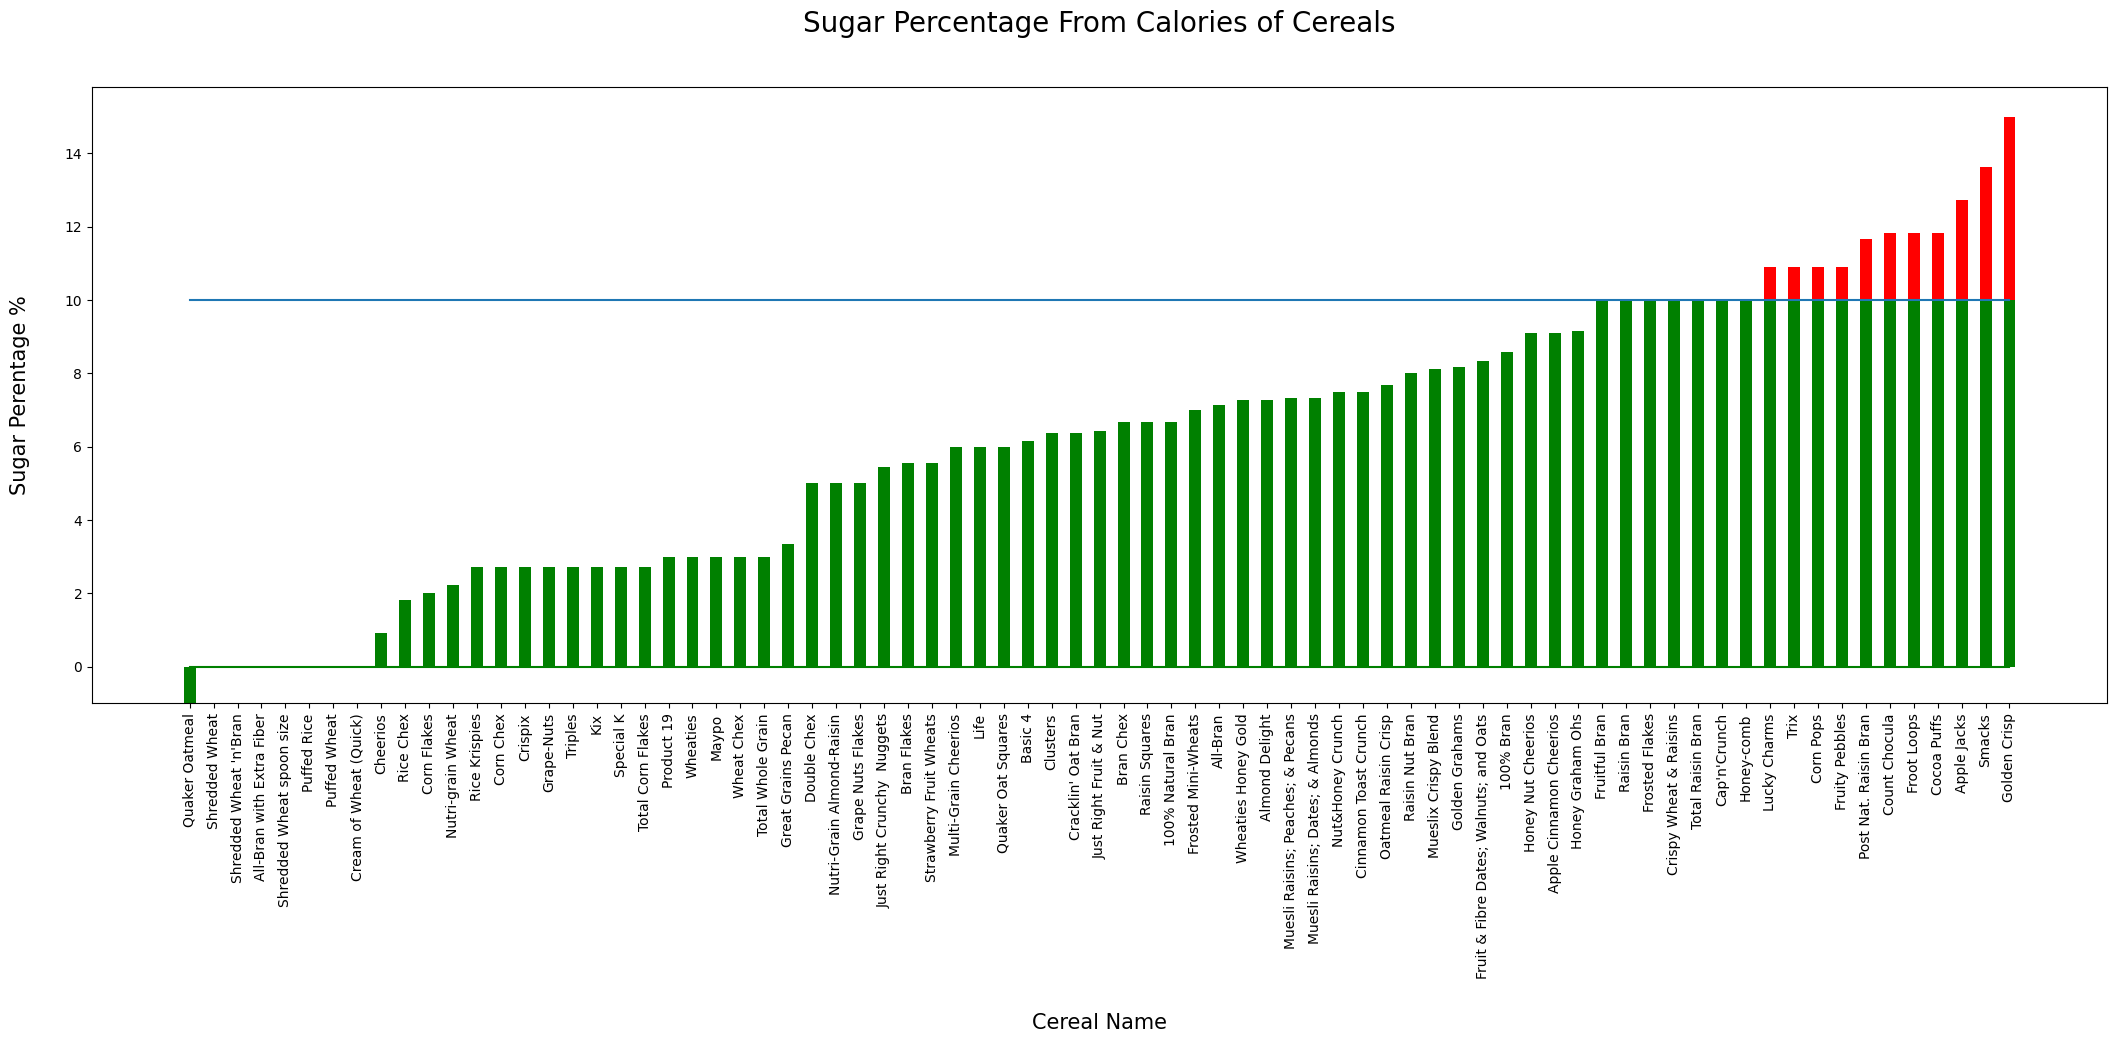

In [4]:
data = recs_df.sort_values(by=['sugars%'])
threshold = 10.0
x = data['name'].values
y = data['sugars%'].values * 100
fig, ax = plt.subplots(figsize=(26,8))
above_threshold = np.maximum(y-threshold, 0)
below_threshold = np.minimum(y, threshold)
ax.set_title(label="Sugar Percentage From Calories of Cereals", fontsize=20, pad=40)
ax.set_ylabel("Sugar Perentage %", fontsize=15, labelpad=25)
ax.set_xlabel("Cereal Name", fontsize=15, labelpad=25)
ax.bar(x, np.minimum(y, threshold), 0.5, color='g')
ax.bar(x, np.maximum(y-threshold, 0), 0.5, color='r', bottom=below_threshold)
ax.plot([x[0], x[-1]], [threshold, threshold])
ax.plot([x[0], x[-1]], [0, 0], color='g')
ax.tick_params(axis='x', rotation = 90)
plt.show()

Cereal that have a sugar percentage above the 10% threshold shown on the plot are highlighted in red here. Oddly enough, Quaker Oatmeal has a negative value in sugar nutrition, therefore is plotted downward.

Now we will do the same visualization for fat percentage

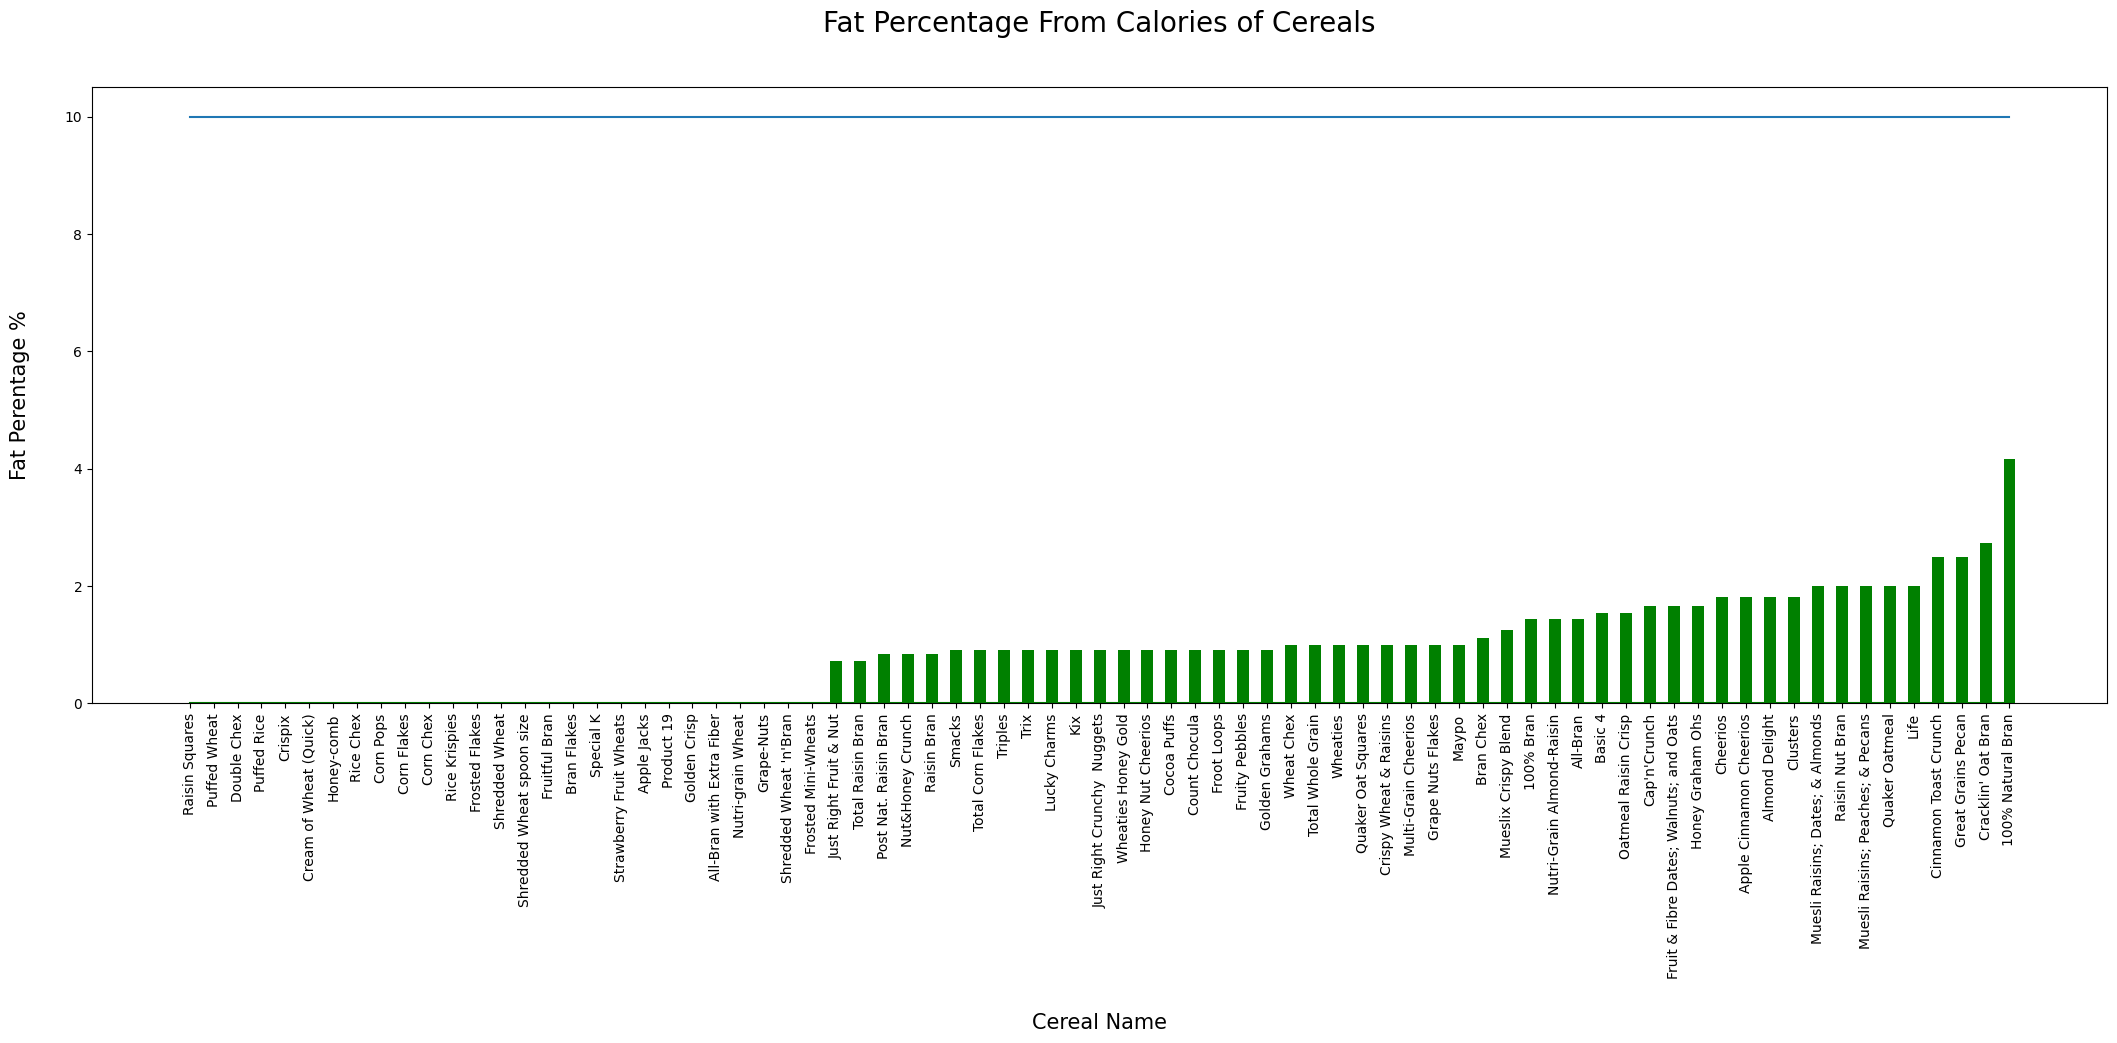

In [5]:
data = recs_df.sort_values(by=['fat%'])
threshold = 10.0
x = data['name'].values
y = data['fat%'].values * 100
fig, ax = plt.subplots(figsize=(26,8))
above_threshold = np.maximum(y-threshold, 0)
below_threshold = np.minimum(y, threshold)
ax.set_title(label="Fat Percentage From Calories of Cereals", fontsize=20, pad=40)
ax.set_ylabel("Fat Perentage %", fontsize=15, labelpad=25)
ax.set_xlabel("Cereal Name", fontsize=15, labelpad=25)
ax.bar(x, np.minimum(y, threshold), 0.5, color='g')
ax.bar(x, np.maximum(y-threshold, 0), 0.5, color='r', bottom=below_threshold)
ax.plot([x[0], x[-1]], [threshold, threshold])
ax.plot([x[0], x[-1]], [0, 0], color='g')
ax.tick_params(axis='x', rotation = 90)
plt.show()

All cereal brands are below 10% fat.

The US Governments Dietary Guidelines’ Executive Summary recommends to limit sodium intake to less than 2300mg. We will visualize this in a per calorie basis. According to NHS (https://www.nhs.uk/common-health-questions/food-and-diet/what-should-my-daily-intake-of-calories-be/), the average man should consume 2500 calories and the average woman should consume 2000 calories. This equates to 1.25mg of sodium per calorie and 0.87mg of sodium per calorie respectively. This can be demonstraterd in a scatter plot where a linear line will demonstrate a sodium per calorie from the recommended 2300mg daily intake. Cereals that lie above the line will be considered to have excessive sodium.

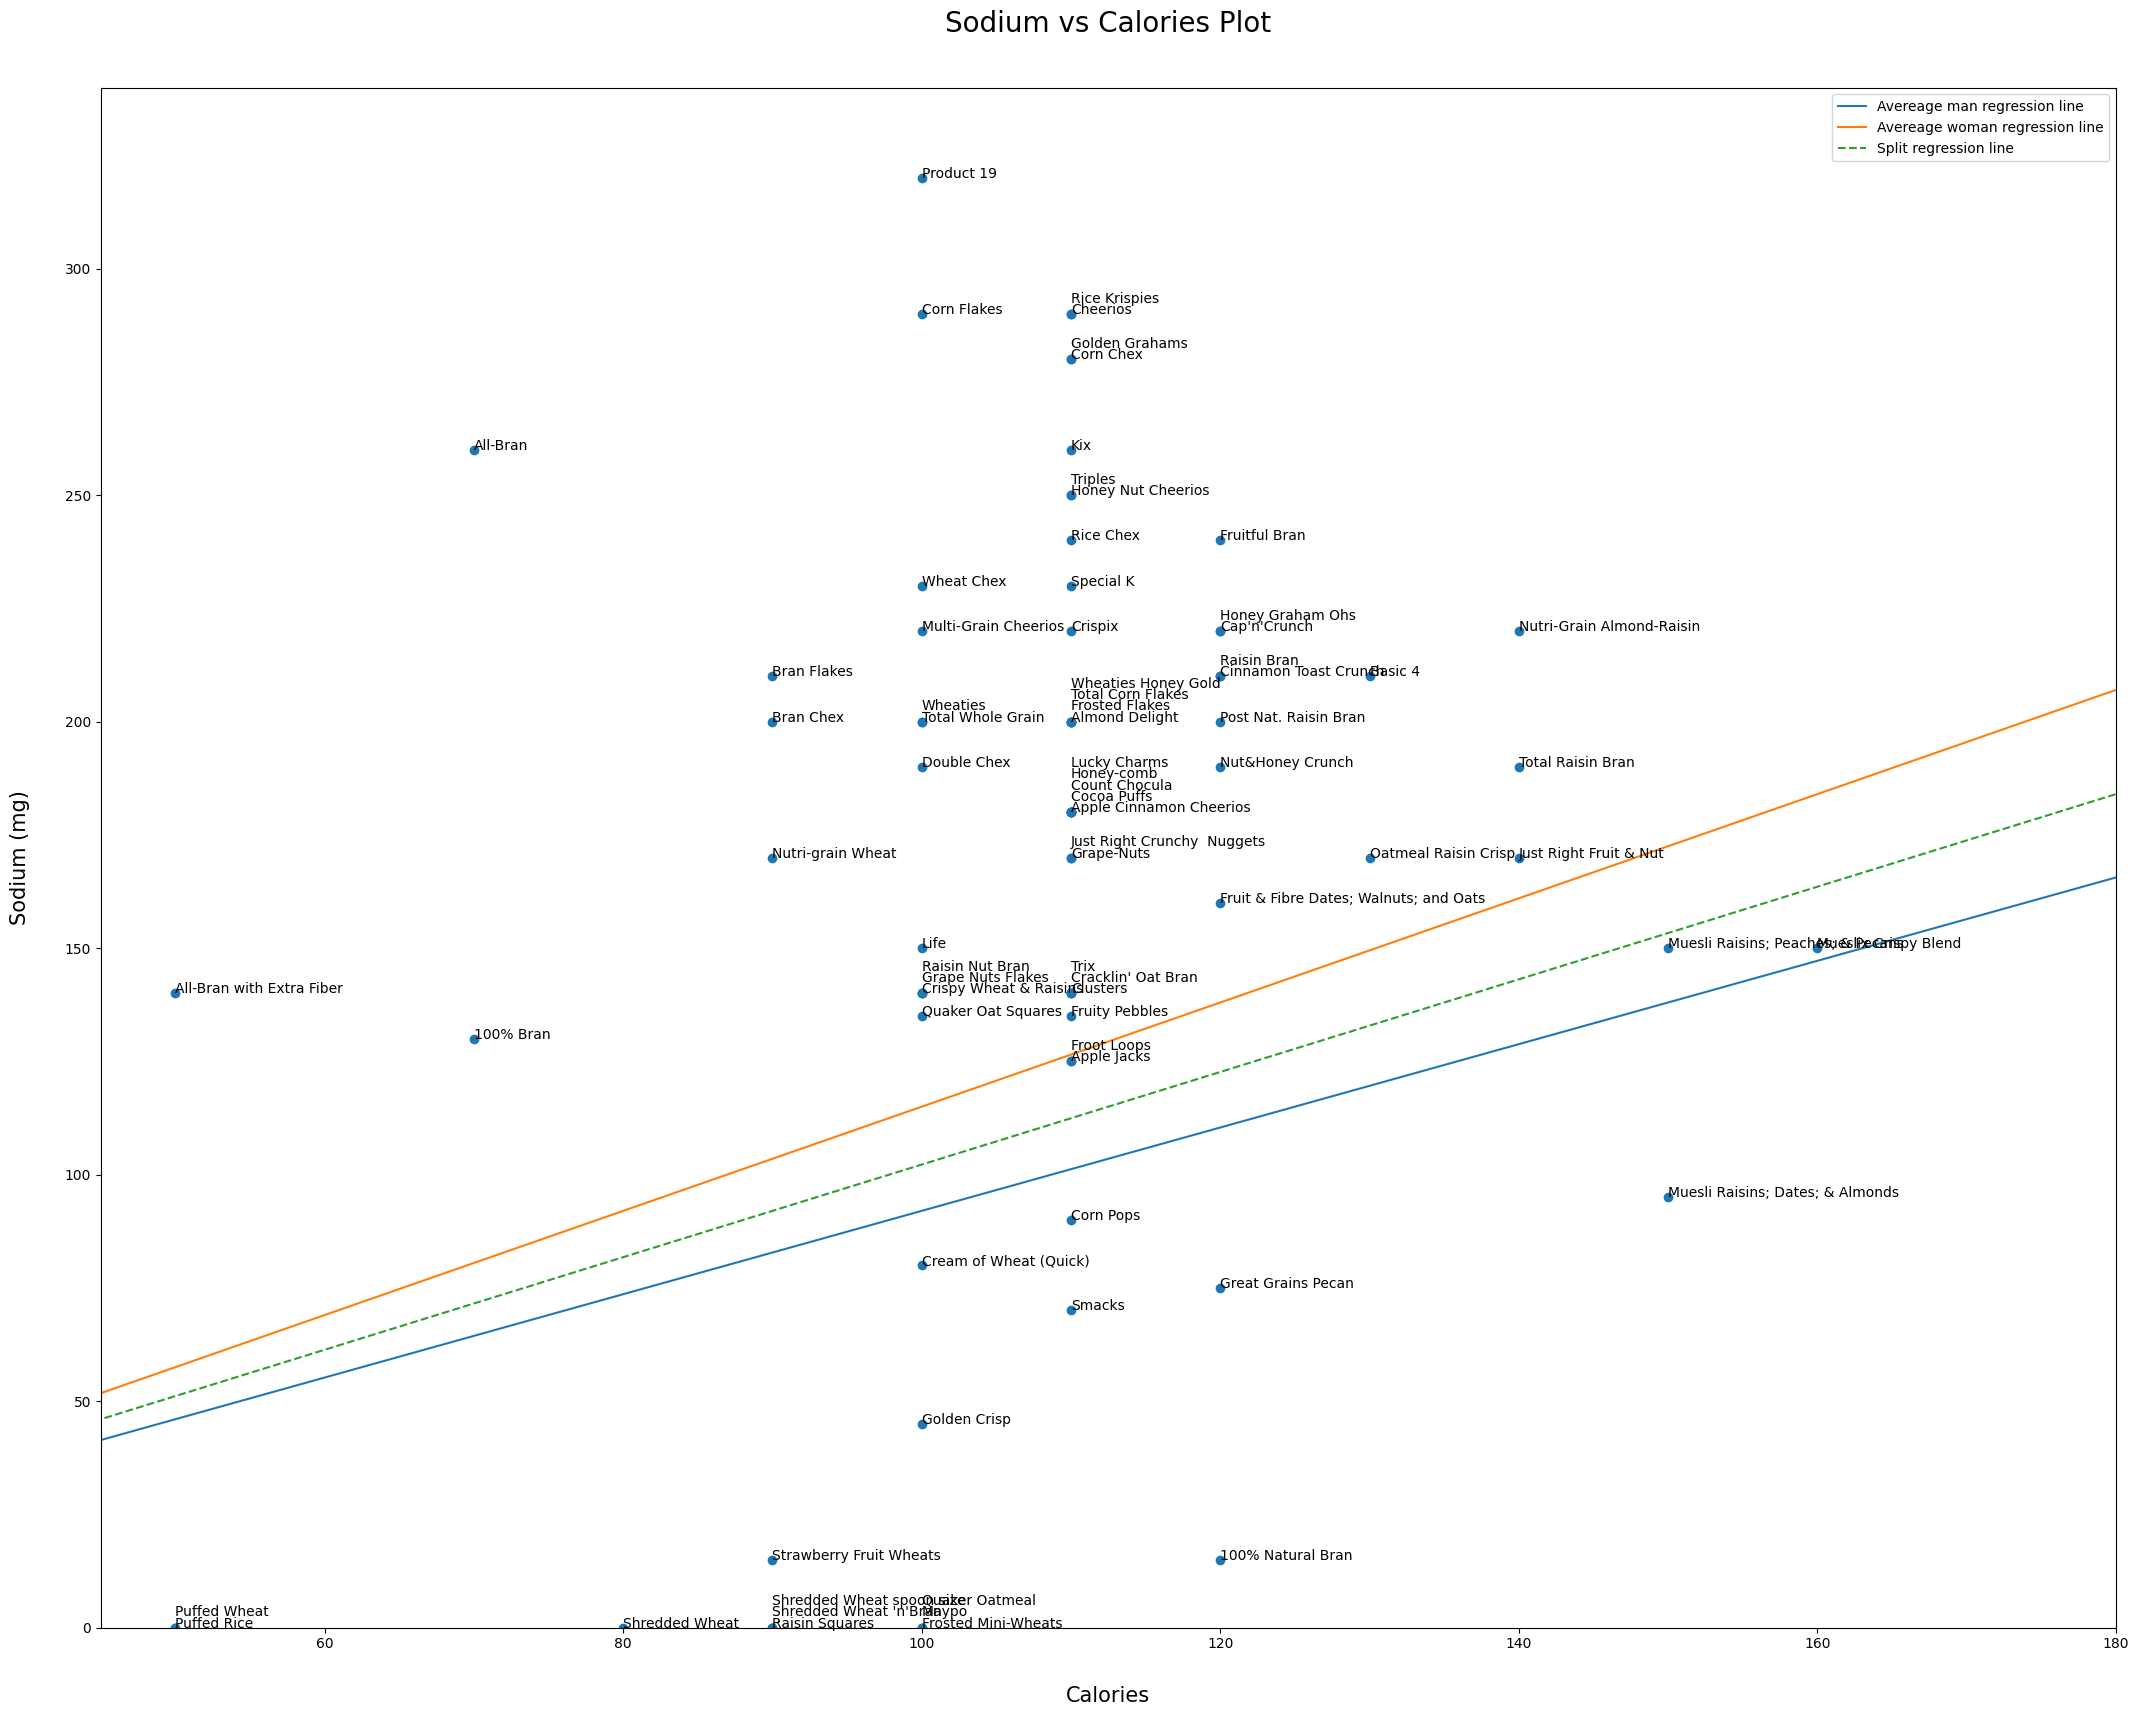

In [6]:
x = recs_df['calories']
y = recs_df['sodium']

men_threshold_x = [0, 2500]
wommen_threshold_x = [0, 2000]
split_threshold_x = [0, 2250]
threshold_y = [0, 2300]

fig, ax = plt.subplots(figsize=(26,20))

ax.set_title(label="Sodium vs Calories Plot", fontsize=20, pad=40)
ax.set_ylabel("Sodium (mg)", fontsize=15, labelpad=25)
ax.set_xlabel("Calories", fontsize=15, labelpad=25)
ax.scatter(x, y)

# For readabilty purposes, if multiple labels have the same coordinates, we will write it slightly below the previous tex
points = list()
for index, row in recs_df.iterrows():
    x_point = row['calories']
    y_point = row['sodium']
    while [x_point, y_point] in points:
        y_point += 2.5
    ax.annotate(row['name'], (x_point, y_point))
    points.append([x_point, y_point])

ax.plot(men_threshold_x, threshold_y, label='Avereage man regression line')
ax.plot(wommen_threshold_x, threshold_y, label='Avereage woman regression line')
ax.plot(split_threshold_x, threshold_y, label='Split regression line', linestyle='dashed')
ax.legend()

ax.set_xlim(45, 180)
ax.set_ylim(0, 340)
plt.show()

All cereal that were equal to or less than 10% sugar, and above the split sodium regression line will be removed from the recommended cereal dataframe. Fat percentage can be ignored here since all cereal data was below the recommended guidelines for fat.

In [7]:

sodium_per_calorie_ratio = 2300/2250

recs_df = recs_df.where(recs_df['sugars%']<0.1)
recs_df = recs_df.dropna()
recs_df = recs_df.where((recs_df['sodium']/recs_df['calories'])<sodium_per_calorie_ratio)
recs_df = recs_df.dropna()

The remaining dataframe will be narrowed down to 5 recommendations by a point system. Each cereal will be awarded points based on how nutrient rich the cereal is. Nutrients will be evaluated on a nutrient per calorie basis. Each nutrient will recieve a point on a rank system per nutrient. For example, if cereal A ranks number two in protein per calorie, then cereal A will receive one point (The cereal ranked in first will receive 0). This will be repeated for every evaluated nutrient, then the cereals with the five lowest points will be recommended.
 The nutrients that will be evaluated are fiber, potassium, vitamins, and protein.

In [12]:
recs_df['fiber%'] = recs_df['fiber'] / recs_df['calories']
recs_df['protein%'] = recs_df['protein'] / recs_df['calories']
recs_df['potass%'] = recs_df['potass'] / recs_df['calories']
recs_df['vitamins%'] = recs_df['vitamins'] / recs_df['calories']

recs_df['points'] = 0
points =  np.arange(len(recs_df))

recs_df = recs_df.sort_values(by=['fiber%'], ascending=False)
recs_df['points'] += points

recs_df = recs_df.sort_values(by=['protein%'], ascending=False)
recs_df['points'] += points

recs_df = recs_df.sort_values(by=['potass%'], ascending=False)
recs_df['points'] += points

recs_df = recs_df.sort_values(by=['vitamins%'], ascending=False)
recs_df['points'] += points

recs_df = recs_df.sort_values(by=['points'])

top5 = recs_df.iloc[0:5]

The output of the bottom cell will be the top 5 recommended list, in ranked order, based on the point system above

In [17]:
print(top5['name'].to_string(index=False))

   Shredded Wheat 'n'Bran
Shredded Wheat spoon size
      Frosted Mini-Wheats
           Raisin Squares
           Shredded Wheat


Now let's visualize the nutrients on these top 5 recommendations compared to the average nutrients on the cereals that did not make the top 5 list after surviving sodium and sugar eliminatioon.

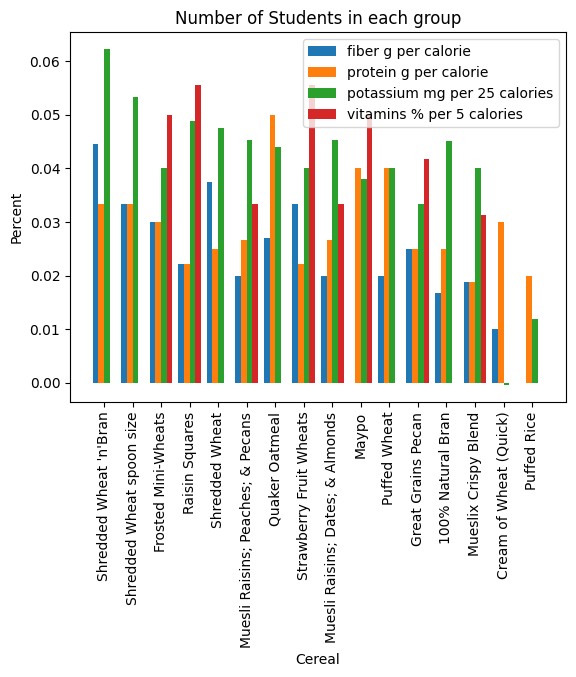

In [51]:

x = recs_df['name']

y_fiber = recs_df['fiber%']
y_protein = recs_df['protein%']
y_potass = recs_df['potass%'] * 0.04
y_vitamins = recs_df['vitamins%'] * 0.2
  
x_axis = np.arange(len(x)) * 2
  
plt.bar(x_axis - 0.6, y_fiber, 0.4, label = 'fiber g per calorie')
plt.bar(x_axis - 0.2, y_protein, 0.4, label = 'protein g per calorie')
plt.bar(x_axis + 0.2, y_potass, 0.4, label = 'potassium mg per 25 calories')
plt.bar(x_axis + 0.6, y_vitamins, 0.4, label = 'vitamins % per 5 calories')

plt.xlabel("Cereal")
plt.xticks(x_axis, x, rotation='vertical')
plt.ylabel("Percent")
plt.title("Percent of Cereal nutrition per Cereal")
plt.legend()
plt.xticks(x_axis, x, rotation='vertical')
plt.show()